https://keras.io/getting-started/sequential-model-guide/

In [4]:
import pandas as pd
import numpy as np 
import keras

import matplotlib.pyplot as plt
% matplotlib inline

/Users/yueyingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys
/Users/yueyingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


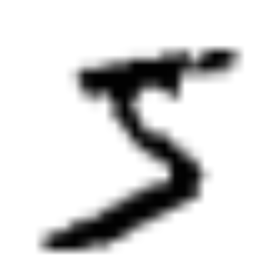

In [19]:
# pyhton mnist loader 

import mnist
import scipy.misc

images = mnist.train_images()
scipy.misc.toimage(scipy.misc.imresize(images[0,:,:] * -1 + 256, 10.))


In [18]:
# continue from pyhton mnist loader 

train_loader = mnist.train_images()
train_labels_loader = mnist.train_labels()

test_images_loader = mnist.test_images()
test_labels_loader = mnist.test_labels()

# Images are returned as a 3D numpy array (samples * rows * columns). 
# To train machine learning models, usually a 2D array is used (samples * features). To get it, simply use:

x = images.reshape((images.shape[0], images.shape[1] * images.shape[2]))

print (images.shape)
print (x.shape)

/Users/yueyingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys
/Users/yueyingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


(60000, 28, 28)
(60000, 784)


## from Kaggle

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [206]:
# load train and test data 

x_train = pd.read_csv('train.csv').iloc[:, 1:]
x_test = pd.read_csv('test.csv')


In [207]:
# create train and test labels

y_train = train.iloc[:, 0]
y_test = test.iloc[:, 0]

In [208]:
print (x_train.shape)
print (x_test.shape)

print(y_train.shape)
print(y_test.shape)

(42000, 784)
(28000, 784)
(42000,)
(28000,)


In [41]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### visualize images

In [209]:
# needs array data - convert dataframe to arrays

X_train = x_train.values
print(X_train.shape)
X_test = x_test.values 

# show three image examples 
X_train[3: 6]

(42000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

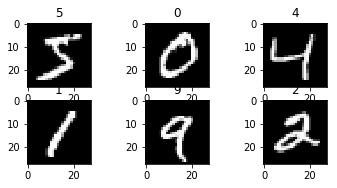

In [215]:
# Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 6):
    plt.subplot(330 + i + 1)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))  # input of imshow may be an array or a PIL image
    plt.title(y_train[i])    

In [176]:
# expand one more dimention - add one channel for colour

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [177]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

### feature standardization 

center the (all) data around zero mean and unit variance 


In [85]:
mean_x = X_train.mean()
std_x = X_train.std()

def standardize(x): 
    return (x - mean_x)/std_x

### change label from int64 to categorical variables 

In [179]:
from keras.utils.np_utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

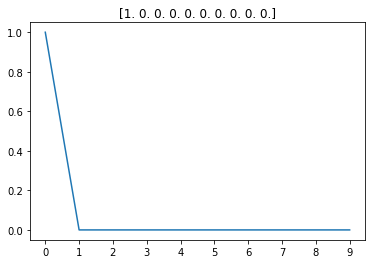

In [182]:
# plot the label for the 5th image , which is zero

plt.title(y_train[4])
plt.plot(y_train[4])
plt.xticks(range(10));

### NN architecture design - Linear Model

In [125]:
seed = 432
np.random.seed(seed)

In [129]:
from keras.models import Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Lambda layer - simple arithmetic operation like sum, average, exponentiation; also need to define input dimensions 

Flatten - transform input to 1D array

Dense - fully connnected layer; also need to define output dimensions

In [130]:
model = Sequential()
model.add(Lambda(standardize, input_shape = (28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

print('input dimesnion', model.input_shape)
print('output dimension', model.output_shape)

input dimesnion (None, 28, 28, 1)
output dimension (None, 10)


### Compile network

After setting up the Neural Network architecture, think about the loss function, optimizer and evaluation metrics.

Before training the model, use compile to configure the learning process. It receives three three arguments 
 - an optimizer, either a string or an instance of the Optimizer class 
 - a loss function, either a string or an objective function, losses
 - a list of metrics, for any classifiction probel you will want to set this to metrics = ['accuracy']

In [131]:
from keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

Keras provides the **ImageDataGenerator** class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

- Sample-wise standardization.
- Feature-wise standardization.
- ZCA whitening.
- Random rotation, shifts, shear and flips.
- Dimension reordering.
- Save augmented images to disk.

Rather than performing the operations on the entire image dataset in memory, the API is designed to be iterated by the deep learning model fitting process. This reduces memory overhead, but adds some additional time cost during model training.

In [132]:
from keras.preprocessing import image

gen = image.ImageDataGenerator()

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 2018)

# ...flow takes numpy data and label arrays and generate augmented/ normalized data 
batches = gen.flow(X_train, y_train, batch_size = 64)

# for validation 
val_batches = gen.flow(X_val, y_val, batch_size = 64)

print(batches.n)
print(val_batches.n)

34020
3780


### Training

**model.fit** trains the model on a fixed number of epoches(iteration on a dataset) and returns a history object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values(if applicable).

**model.fit_generator** fits the model on data generated batch-by-batch by a bython generator. This generator is run parallel to the model, for efficiency. This allows you to do real-time data augmentation on images on CPU in parallel to training your model on GPU. This method also returns a history object.

In [146]:
# fit the model on batches 

history = model.fit_generator(batches, batches.n, nb_epoch = 10, validation_data = val_batches, nb_val_samples = val_batches.n)

Epoch 1/10
   81/34020 [..............................] - ETA: 1:07 - loss: 0.2217 - acc: 0.9402

/Users/yueyingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yueyingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 34020, validation_data=<keras.pre..., epochs=10, validation_steps=3780)`
  This is separate from the ipykernel package so we can avoid doing imports until


34020/34020 [==============================] - 67s 2ms/step - loss: 0.2112 - acc: 0.9421 - val_loss: 0.3175 - val_acc: 0.9222
Epoch 2/10
34020/34020 [==============================] - 67s 2ms/step - loss: 0.2031 - acc: 0.9447 - val_loss: 0.3583 - val_acc: 0.9132
Epoch 3/10
34020/34020 [==============================] - 65s 2ms/step - loss: 0.1990 - acc: 0.9460 - val_loss: 0.3770 - val_acc: 0.9135
Epoch 4/10
34020/34020 [==============================] - 62s 2ms/step - loss: 0.1963 - acc: 0.9469 - val_loss: 0.3990 - val_acc: 0.9087
Epoch 5/10
34020/34020 [==============================] - 66s 2ms/step - loss: 0.1942 - acc: 0.9479 - val_loss: 0.4112 - val_acc: 0.9098
Epoch 6/10
34020/34020 [==============================] - 67s 2ms/step - loss: 0.1929 - acc: 0.9484 - val_loss: 0.4316 - val_acc: 0.9050
Epoch 7/10
34020/34020 [==============================] - 64s 2ms/step - loss: 0.1918 - acc: 0.9489 - val_loss: 0.4385 - val_acc: 0.9037
Epoch 8/10
34020/34020 [============================

### training validation visualization 

In [147]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

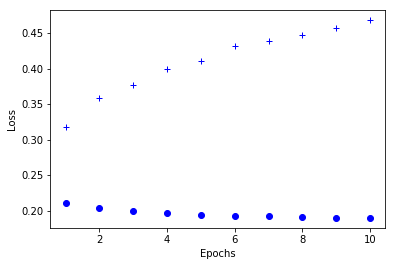

In [148]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

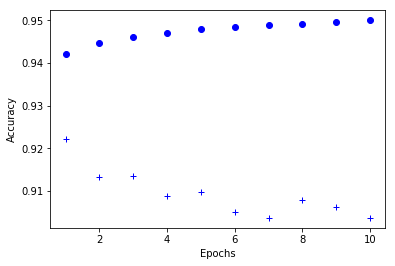

In [149]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Validation accuracy starts to decrease after the first epoch; model overfits. It may not be necessaary to increase the number of epochs 

### retrain the model using same parameters but nb_epoch  = 1

In [160]:
model.optimizer.lr = 0.001
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size = 64)

# only on training data now 
history = model.fit_generator(batches, batches.n, nb_epoch = 1)

Epoch 1/1
   94/34020 [..............................] - ETA: 57s - loss: 0.1990 - acc: 0.9498 

/Users/yueyingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/yueyingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 34020, epochs=1)`
  


34020/34020 [==============================] - 56s 2ms/step - loss: 0.1874 - acc: 0.9523


In [161]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Predictions 

In [157]:
predictions = model.predict_classes(X_test, verbose = 0)
predictions

array([2, 0, 9, ..., 3, 9, 2])

#### Experiment on Data Aumgentation 

In [24]:
from keras.datasets import mnist
from keras.preprocessing import image

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print (X_train.shape)
print (y_train.shape)

(60000, 28, 28, 1)
(60000,)


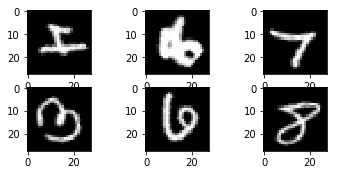

In [25]:
# define data preparation - after configuring image.ImageDataGenerator(), must fit it on the data 
# the data generator itself is actually an iterator, returning batches of image samples when requested.

datagen = image.ImageDataGenerator(rotation_range = 100)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve ONE batch of images - 
# configure the batch size and prepare the data generator and get batches of images by calling the flow() function

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 6):
    # visualization
    for i in range(0, 6):
        # create the grid
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
    plt.show()
    break



In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

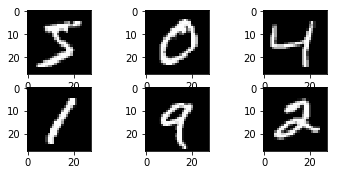

In [15]:
# comapre with original data 

for i in range(0, 6):
    # create the grid
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
plt.show()